In [3]:
__author__= "ShAnXie,20216404@stu.neu.edu.cn"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 加载数据以及可视化数据

In [5]:
data = pd.read_csv("Data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

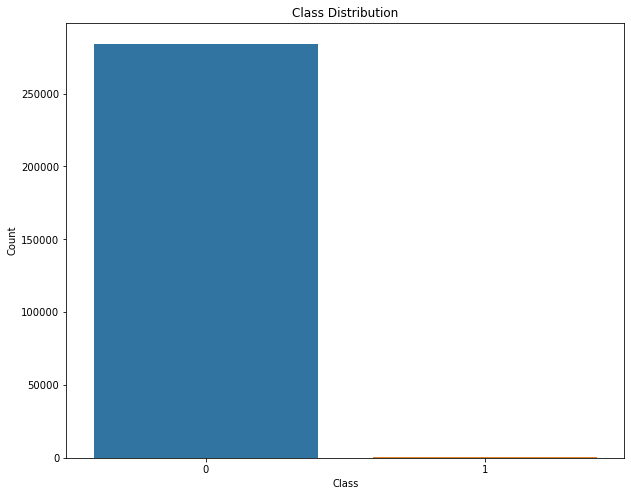

In [7]:
plt.figure(figsize= (10,8))
sns.countplot(x='Class',data = data)
plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

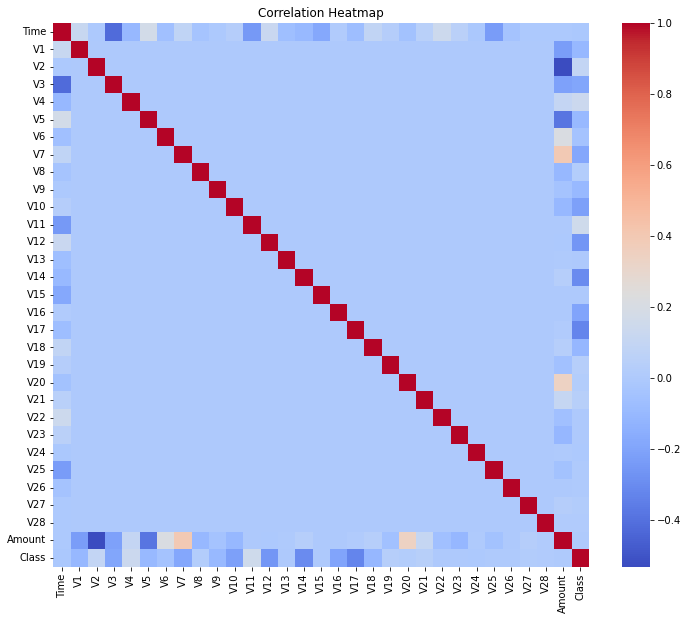

In [8]:
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,cmap = 'coolwarm',annot = False)
plt.title('Correlation Heatmap')
plt.show()

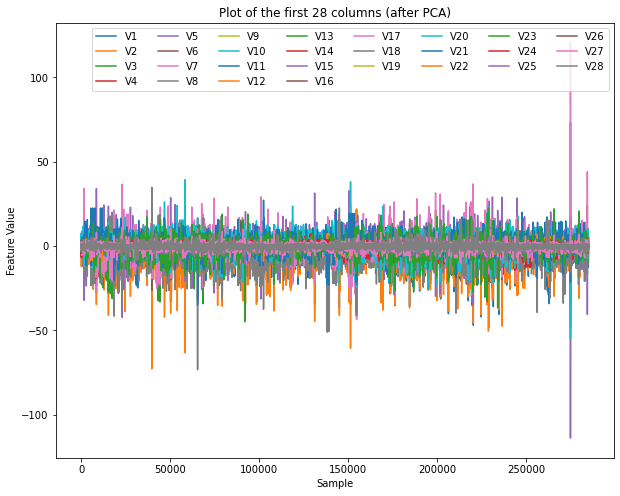

In [9]:

# plot the features (not amount or class)
plt.figure(figsize=(10, 8))

# 遍历 'V1' 到 'V28' 列，并绘制折线图
for a in range(1, 29):
    plt.plot(data['V'+str(a)], label='V'+str(a))

# 添加图例，设置标题和坐标轴标签
plt.legend(loc='best', fontsize=10, ncol=8)
plt.title("Plot of the first 28 columns (after PCA)")
plt.xlabel("Sample")
plt.ylabel("Feature Value")

# 显示图形
plt.show()

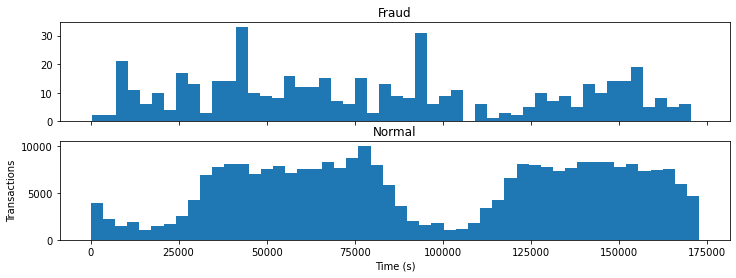

In [11]:
# 使用subplots创建一个包含两个子图的图表
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

# 在第一个子图(ax1)中绘制欺诈交易的时间分布直方图
ax1.hist(data.Time[data.Class == 1], bins=50)
ax1.set_title('Fraud')  # 设置子图标题

# 在第二个子图(ax2)中绘制正常交易的时间分布直方图
ax2.hist(data.Time[data.Class == 0], bins=50)
ax2.set_title('Normal')  # 设置子图标题

# 共享x轴，设置整体图表的x轴标签和y轴标签
plt.xlabel('Time (s)')
plt.ylabel('Transactions')

# 显示图形
plt.show()


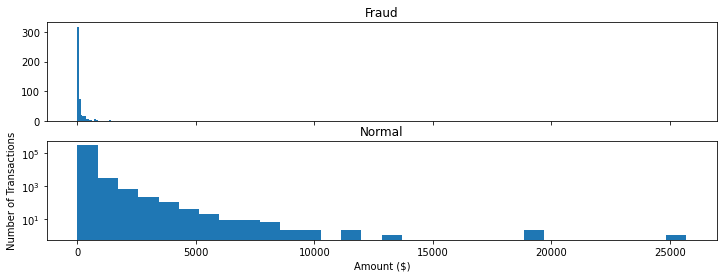

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(data.Amount[data.Class == 1], bins = 30)
ax1.set_title('Fraud')
ax2.hist(data.Amount[data.Class == 0], bins = 30)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

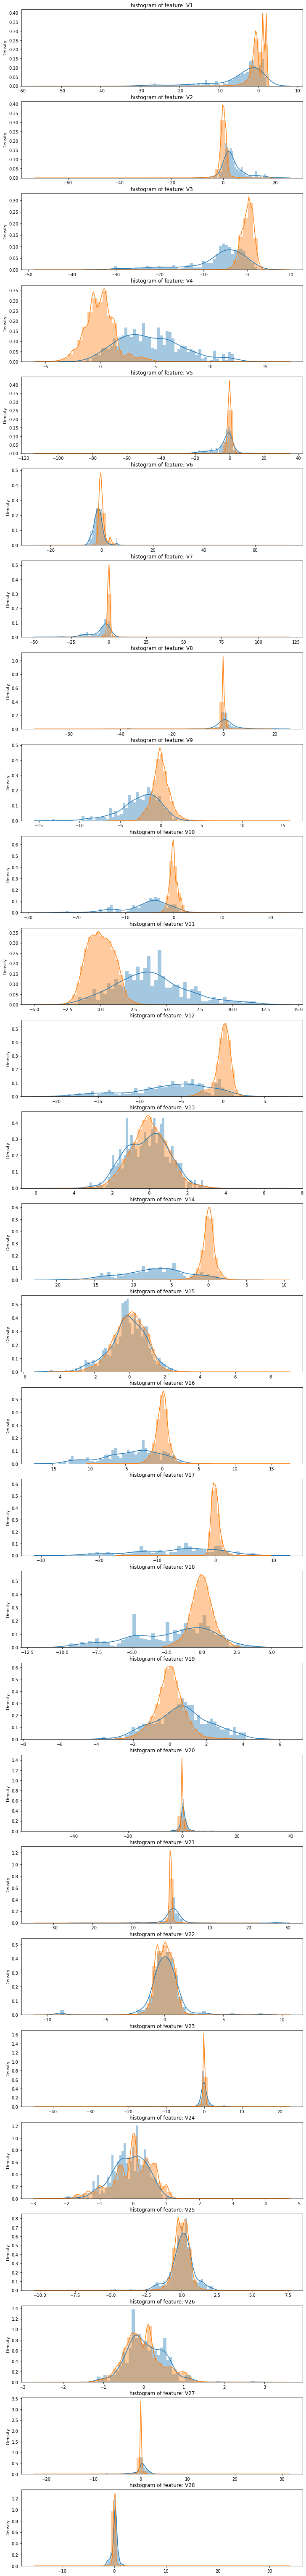

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(data['V'+str(i)][data.Class == 1], bins=50)
    sns.distplot(data['V'+str(i)][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

In [15]:
# 查看目标变量（是否欺诈）的分布
fraud_distribution = data['Class'].value_counts()
print(fraud_distribution)

# 统计欺诈和非欺诈的比例
fraud_percentage = fraud_distribution / len(data) * 100
print("欺诈比例：", fraud_percentage)

0    284315
1       492
Name: Class, dtype: int64
欺诈比例： 0    99.827251
1     0.172749
Name: Class, dtype: float64
